In [51]:
import pandas as pd
import sklearn

In [52]:
data=pd.read_csv("C:/Users/91832/Downloads/spotify_millsongdata.csv/spotify_millsongdata.csv")

In [53]:
data

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


In [54]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [55]:
data["artist"]=label.fit_transform(data["artist"])
data["song"]=label.fit_transform(data["song"])
data["link"]=label.fit_transform(data["link"])
data["text"]=label.fit_transform(data["text"])

In [56]:
data.head(5)

,artist,song,link,text
0,1,1366,0,29686
1,1,2347,1,41031
2,1,2897,2,22039
3,1,3683,4,30556
4,1,3696,3,30557


In [57]:
data.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [58]:
x=data.drop(["song"],axis=1)

In [59]:
x

,artist,link,text
0,1,0,29686
1,1,1,41031
2,1,2,22039
3,1,4,30556
4,1,3,30557
...,...,...,...
57645,636,57358,26045
57646,636,57360,36174
57647,642,57505,57348
57648,642,57506,57437


In [60]:
y=data["song"]
y

0         1366
1         2347
2         2897
3         3683
4         3696
         ...  
57645    14993
57646    15646
57647     7908
57648     9428
57649    16329
Name: song, Length: 57650, dtype: int32

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [62]:
len(x_train)

46120

In [63]:
len(y_train)

46120

In [64]:
len(x_test)

11530

In [65]:
len(y_test)

11530

In [66]:
from sklearn.cluster import KMeans

In [67]:
cluster=KMeans(n_clusters=4)

In [68]:
cluster.fit(data)

C:\Users\91832\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [69]:
groups=cluster.predict(data)

In [70]:
data["groups"]=groups

In [71]:
data.head()

,artist,song,link,text,groups
0,1,1366,0,29686,0
1,1,2347,1,41031,1
2,1,2897,2,22039,0
3,1,3683,4,30556,0
4,1,3696,3,30557,0


In [72]:
data["groups"].unique()#----> to see how many groups

array([0, 1, 3, 2])

In [73]:
#c1 = data.loc[data["labels"]==0]

In [74]:
#analysis for data
group_0=data.loc[data["groups"]==0]

In [75]:
import matplotlib.pyplot as plt

(array([2030., 1869., 1812., 1838., 1872., 1181., 1020.,  856.,  800.,
         709.]),
 array([1.00000e+00, 4.48310e+03, 8.96520e+03, 1.34473e+04, 1.79294e+04,
        2.24115e+04, 2.68936e+04, 3.13757e+04, 3.58578e+04, 4.03399e+04,
        4.48220e+04]),
 <BarContainer object of 10 artists>)

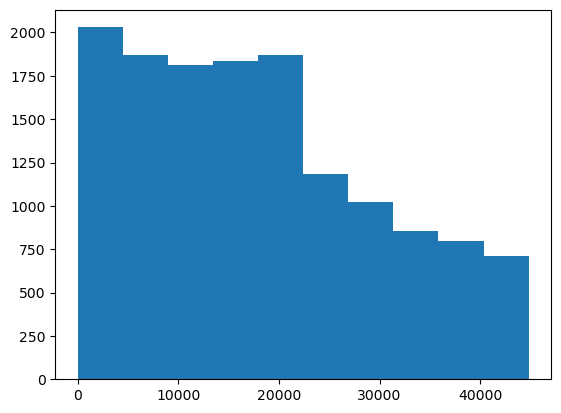

In [76]:
#plt.hist(c1["total_bill"])
plt.hist(group_0["song"])

(array([1241., 1339., 1240., 1353., 1182., 1748., 1718., 1660., 1545.,
        1682.]),
 array([1.00000e+01, 4.49130e+03, 8.97260e+03, 1.34539e+04, 1.79352e+04,
        2.24165e+04, 2.68978e+04, 3.13791e+04, 3.58604e+04, 4.03417e+04,
        4.48230e+04]),
 <BarContainer object of 10 artists>)

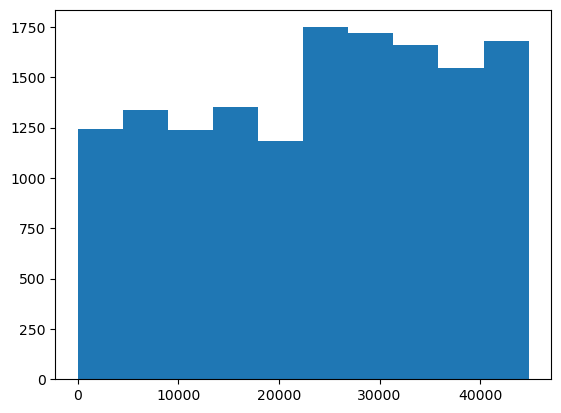

In [77]:
#analysis for data
group_1=data.loc[data["groups"]==1]
plt.hist(group_1["song"])

(array([1098., 1209., 1265., 1229., 1113., 1489., 1690., 1811., 1747.,
        1688.]),
 array([1.60000e+01, 4.49640e+03, 8.97680e+03, 1.34572e+04, 1.79376e+04,
        2.24180e+04, 2.68984e+04, 3.13788e+04, 3.58592e+04, 4.03396e+04,
        4.48200e+04]),
 <BarContainer object of 10 artists>)

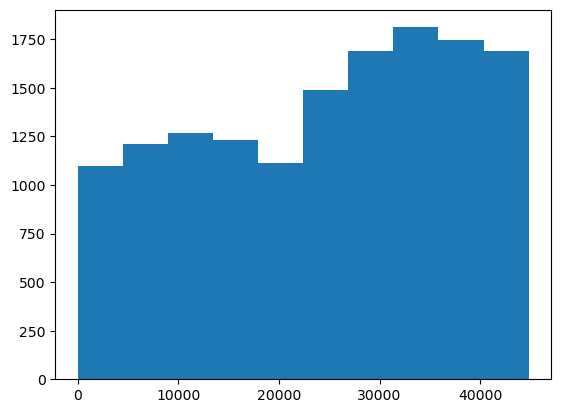

In [78]:
#analysis for data
group_2=data.loc[data["groups"]==2]#== to equall the row
plt.hist(group_2["song"])

In [79]:
from sklearn.metrics import silhouette_score
print(silhouette_score(data,groups))

0.28012944944954593
